In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [117]:
# So for the plot x-axis is input width, y-axis is normalized bump amplitude, and points are the regime

#change to your directory
dir = '/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src'
file_name = '/results/d90.txt' #change to yours
header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp'] #from their code
df = pd.read_csv(dir + file_name, delimiter=' ', header=None, names=header)  # space seperated
df['normalized_bump_amplitude'] = df.iloc[:, 1]/df.iloc[:, 0] # Im pretty sure this is the right thing to do here.
bump_width = df['width'].to_numpy() #nice to isolate

In [142]:
filtered_df = df[df['normalized_bump_amplitude'] <= 1.8] #this is different for the models - check the paper
filtered_df[filtered_df['behaviour'] == 0]

,ampliini,ampliaft,width,behaviour,amp,normalized_bump_amplitude
0,0.076707,0.077131,0.010000,0,0.010000,1.005528
1,0.076707,0.078311,0.010000,0,0.039750,1.020911
2,0.076707,0.079475,0.010000,0,0.069500,1.036085
3,0.076707,0.080638,0.010000,0,0.099250,1.051247
4,0.076707,0.081802,0.010000,0,0.129000,1.066422
...,...,...,...,...,...,...
9194,0.076707,0.078291,2.326867,0,0.015950,1.020650
9250,0.076707,0.077716,2.341531,0,0.010000,1.013154
9252,0.076707,0.077716,2.341531,0,0.010000,1.013154
9253,0.076707,0.078004,2.341531,0,0.012975,1.016908


In [85]:
filtered_df[filtered_df['behaviour'] == 2].sort_values(by=["normalized_bump_amplitude"])

,ampliini,ampliaft,width,behaviour,amp,normalized_bump_amplitude
901,0.076707,0.097172,0.259283,2,0.090325,1.266794
962,0.076707,0.097267,0.273947,2,0.093300,1.268033
1023,0.076707,0.097338,0.288611,2,0.096275,1.268959
1073,0.076707,0.097393,0.303274,2,0.099250,1.269676
1136,0.076707,0.097438,0.317938,2,0.102225,1.270262
...,...,...,...,...,...,...
759,0.076707,0.237517,0.215292,2,1.170250,3.096419
539,0.076707,0.238159,0.156637,2,1.170250,3.104788
699,0.076707,0.238414,0.200628,2,1.170250,3.108113
589,0.076707,0.238620,0.171301,2,1.170250,3.110798


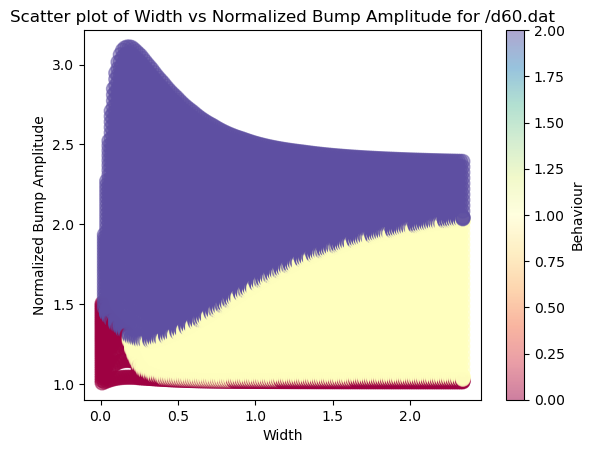

In [86]:
plt.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], s=100, alpha=0.5, cmap='Spectral')
plt.colorbar(label='Behaviour')
plt.xlabel('Width')
plt.ylabel('Normalized Bump Amplitude')
plt.title(f'Scatter plot of Width vs Normalized Bump Amplitude for {file_name}')
plt.plot(0.391257, 1.294901, c='red')
plt.show()

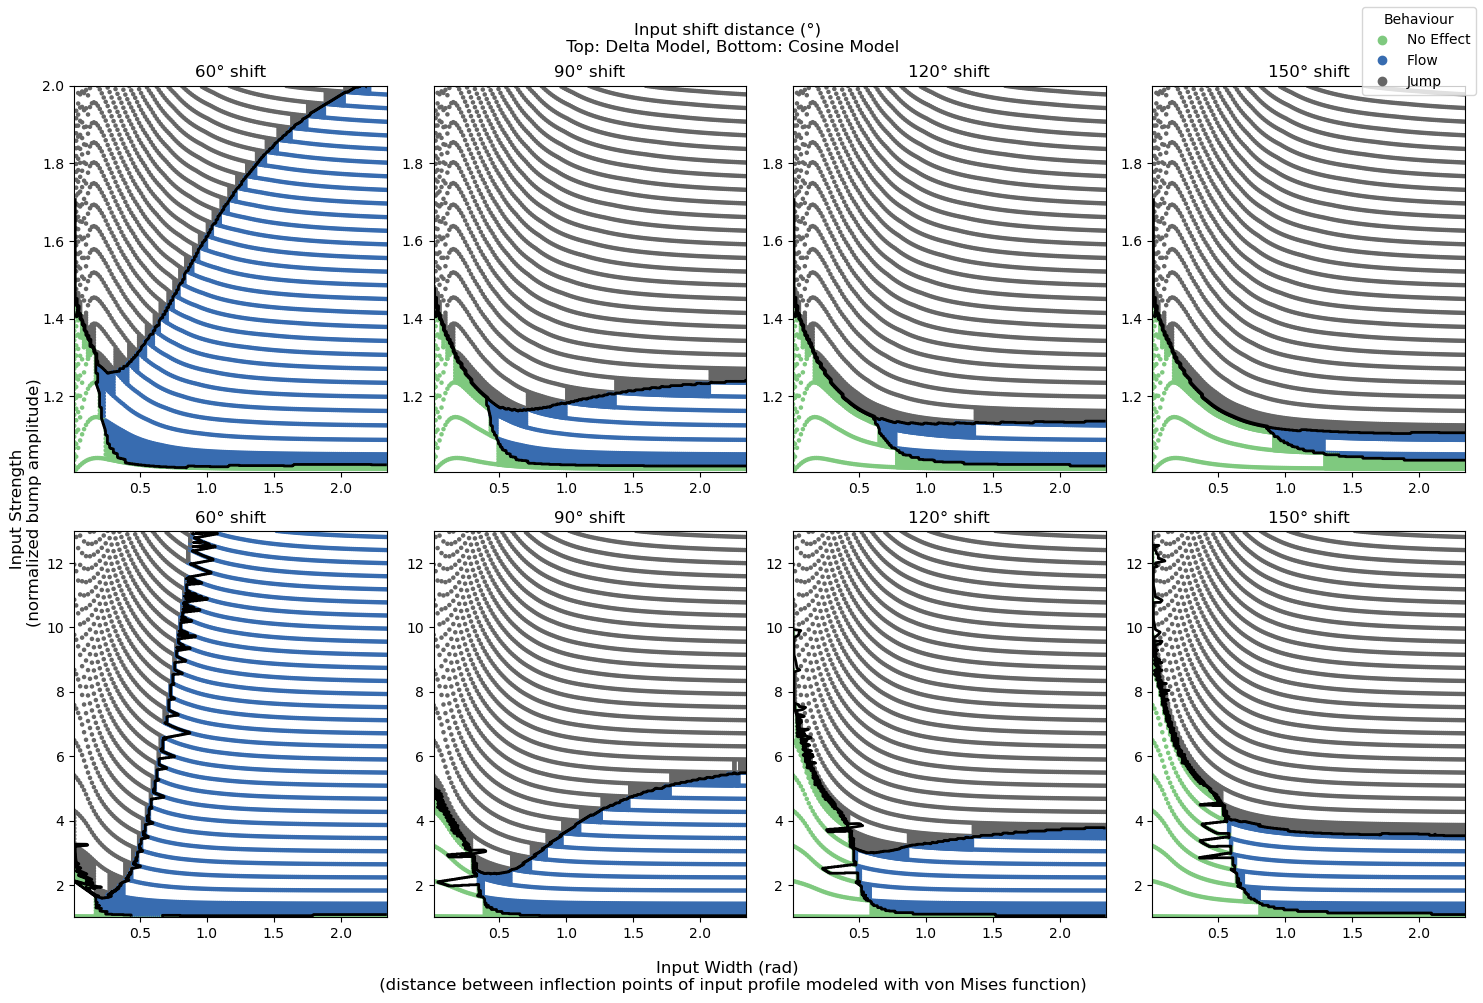

In [33]:
import os
deltas = ["d60.txt", "d90.txt", "d120.txt", "d150.txt"]
delta_threshold = 2
cosines = ["c60.txt", "c90.txt", "c120.txt", "c150.txt"]
cosine_threshold = 13

degree_symbol = u'\N{DEGREE SIGN}'

dir = os.path.join(os.getcwd(), "build/src/results/")



fig, axs = plt.subplots(2, 4, figsize=(15, 10))
for i, delta in enumerate(deltas):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour','amp']  # from their code
    df = pd.read_csv(os.path.join(dir, delta), delimiter=' ', header=None, names=header)  # space separated
    df['normalized_bump_amplitude'] = df.iloc[:, 1] / df.iloc[:, 0]
    filtered_df = df[df['normalized_bump_amplitude'] <= delta_threshold]

    # mesh
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    ax = axs[0, i]
    scatter = ax.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                         s=5, alpha=1, cmap='Accent')
    colours = ['black', 'black', 'black']
    contour = ax.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=2)
    ax.set_title(f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift")

# Create a legend for the scatter plot
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['No Effect', 'Flow', 'Jump']
legend = fig.legend(handles, legend_labels, title="Behaviour", loc="upper right")

for i, cosine in enumerate(cosines):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']  # from their code
    df = pd.read_csv(os.path.join(dir, cosine), delimiter=' ', header=None, names=header)  # space separated
    df['normalized_bump_amplitude'] = df.iloc[:, 1] / df.iloc[:, 0]
    filtered_df = df[df['normalized_bump_amplitude'] <= cosine_threshold]

    # mesh
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    ax = axs[1, i]
    scatter = ax.scatter(filtered_df['width'], filtered_df['normalized_bump_amplitude'], c=filtered_df['behaviour'], 
                         s=5, alpha=1, cmap='Accent')
    colours = ['black', 'black', 'black']
    contour = ax.contour(xi, yi, zi, levels=np.unique(z), colors=colours, linewidths=2)
    ax.set_title(f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} shift")

fig.supxlabel("Input Width (rad) \n (distance between inflection points of input profile modeled with von Mises function)")
fig.supylabel("           Input Strength \n(normalized bump amplitude)")
fig.suptitle(f"Input shift distance ({degree_symbol}) \n Top: Delta Model, Bottom: Cosine Model")


plt.tight_layout()
plt.savefig("fig4_recreate.png", dpi=200)
plt.show()




In [90]:
def find_boundary_contour(contour, narrow_input_rad):
    """
    Find the closest y-value at the narrow input x-coordinate across all contours.
    """
    closest_y = None
    min_distance = np.inf  # Initialize minimum distance

    for collection in contour.collections:
        for path in collection.get_paths():
            vertices = path.vertices
            x_coords, y_coords = vertices[:, 0], vertices[:, 1]
            distances = np.abs(x_coords - narrow_input_rad)  # Distance to narrow input x-coordinate
            
            if len(distances) > 0:
                local_min_index = np.argmin(distances)
                local_distance = distances[local_min_index]
                
                # Update closest y-value if this path is closer
                if local_distance < min_distance:
                    min_distance = local_distance
                    closest_y = y_coords[local_min_index]

    if closest_y is not None:
        return closest_y  # Return the best match
    print("No valid contour found near narrow input.")
    return None

def create_phase_map_with_boundary_redlines(x, y, z, ax, title, grid_size=300, narrow_input_deg=22.5):
    """
    Create a phase map with flat coloring, black contour boundaries, and inferred red lines with dots.

    Parameters:
    - x, y: Coordinates of the data points.
    - z: Phase values (behavior).
    - ax: Matplotlib axis to plot on.
    - title: Title for the subplot.
    - grid_size: Resolution of the interpolation grid.
    - narrow_input_deg: Narrow input angle in degrees (converted to radians).
    """
    # Grid for interpolation
    xi = np.linspace(x.min(), x.max(), grid_size)
    yi = np.linspace(y.min(), y.max(), grid_size)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate behavior values onto the grid
    zi = griddata((x, y), z, (xi, yi), method='nearest')  # Flat coloring

    # Plot the interpolated heatmap
    c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='Accent')

    # Add black contour lines to mark phase boundaries
    contours = ax.contour(xi, yi, zi, levels=np.unique(z), colors='black', linewidths=2)

    # AUTOMATICALLY FIND THE BOUNDARY AND ADD RED LINE/DOT
    narrow_input_rad = np.deg2rad(narrow_input_deg)  # Convert narrow input angle to radians
    boundary_y = find_boundary_contour(contours, narrow_input_rad)  # Find y-value at the boundary

    if boundary_y is not None:
        # Plot the red dashed line at the boundary y-value
        ax.plot([x.min(), x.max()], [boundary_y, boundary_y], 'r--', linewidth=2, label='Input Strength')

        # Add solid red dot at the narrow input position
        ax.scatter(narrow_input_rad, boundary_y, color='red', s=100, zorder=5)

    # Title and labels
    ax.set_title(title, fontsize=12)

    return c, contours

/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col

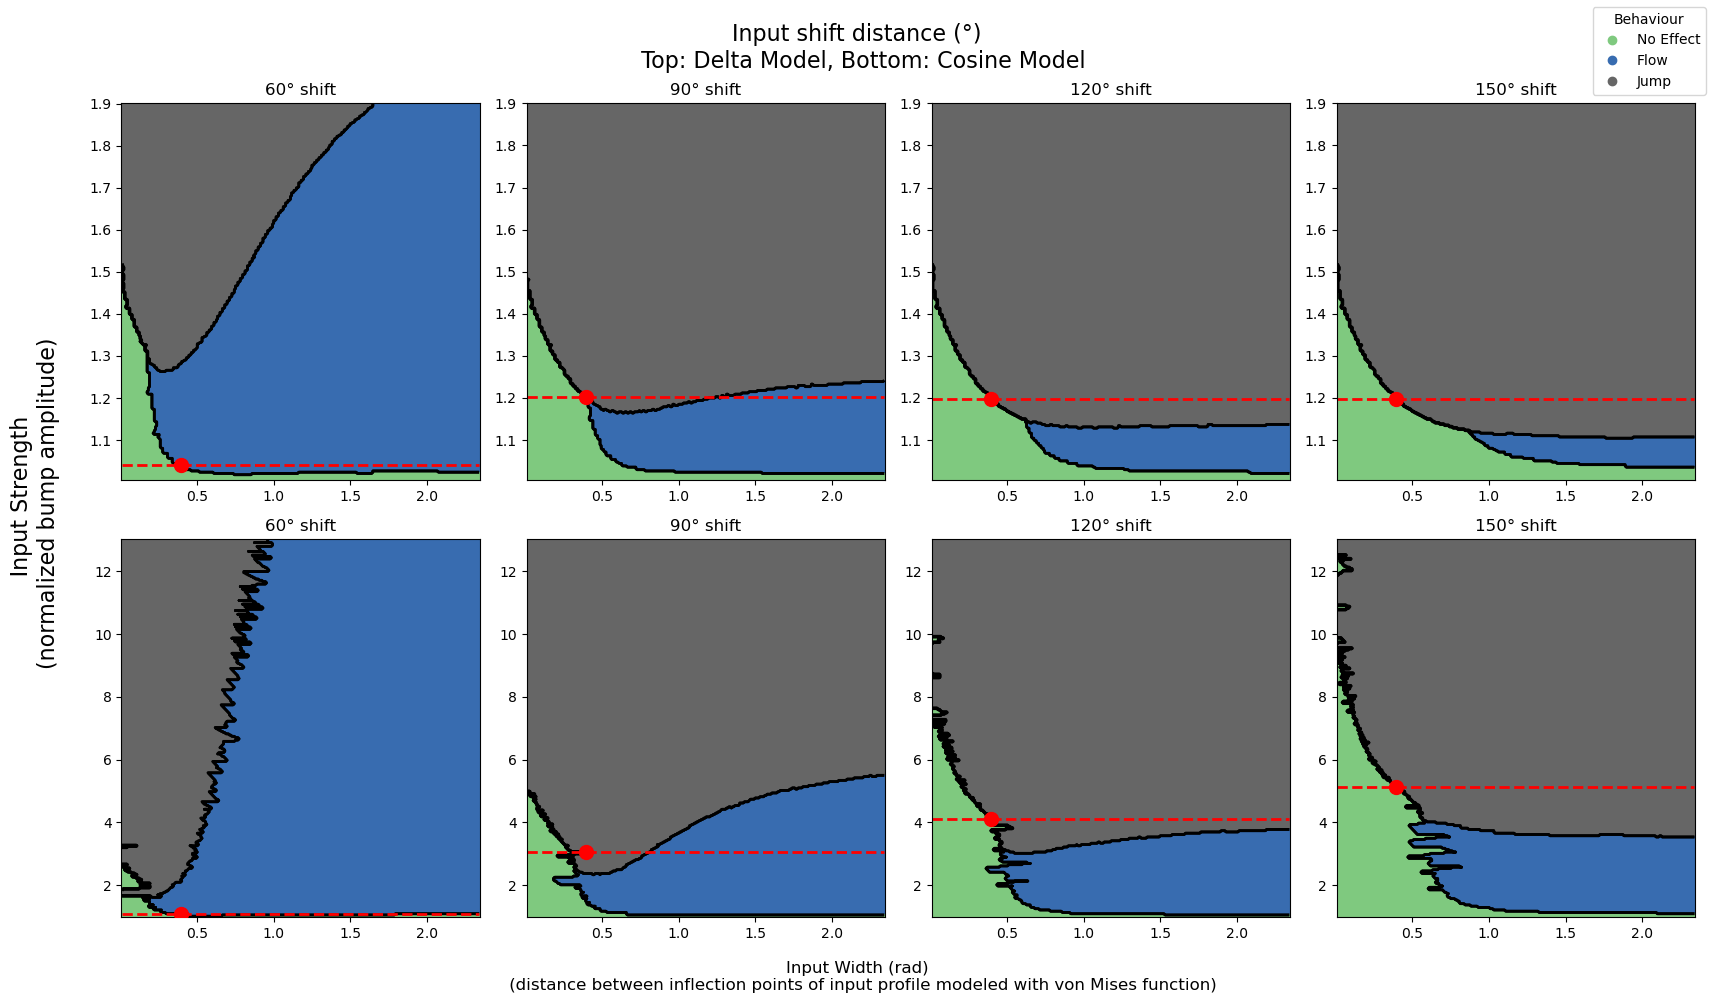

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import os
deltas = ["d60.txt", "d90.txt", "d120.txt", "d150.txt"]
delta_threshold = 1.9
cosines = ["c60.txt", "c90.txt", "c120.txt", "c150.txt"]
cosine_threshold = 13
width_threshold = 2.35

degree_symbol = u'\N{DEGREE SIGN}'

dir = os.path.join(os.getcwd(), "build/src/results/")

fig, axs = plt.subplots(2, 4, figsize=(17, 10))

def create_phase_map_with_contours(x, y, z, ax, title, grid_size=300):
    """
    Create a phase map with flat coloring and black contour boundaries.
    
    Parameters:
    - x, y: Coordinates of the data points.
    - z: Phase values (behavior).
    - ax: Matplotlib axis to plot on.
    - title: Title for the subplot.
    - grid_size: Resolution of the interpolation grid.
    """
    # Grid for interpolation
    xi = np.linspace(x.min(), x.max(), grid_size)
    yi = np.linspace(y.min(), y.max(), grid_size)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate behavior values onto the grid
    zi = griddata((x, y), z, (xi, yi), method='nearest')  # Flat coloring

    # Plot the interpolated heatmap
    c = ax.pcolormesh(xi, yi, zi, shading='auto', cmap='Accent')

    # Add black contour lines to mark phase boundaries
    contours = ax.contour(xi, yi, zi, levels=np.unique(z), colors='black', linewidths=2)

    # Title and labels
    ax.set_title(title, fontsize=12)
    return c, contours

# Top Row: Delta Data
for i, delta in enumerate(deltas):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']
    df = pd.read_csv(os.path.join(dir, delta), delimiter=' ', header=None, names=header)
    df['normalized_bump_amplitude'] = df['ampliaft'] / df['ampliini']
    filtered_df = df[(df['normalized_bump_amplitude'] <= delta_threshold) & (df['width'] <= width_threshold)]

    # Data
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()

    # Create phase map with contours
    ax = axs[0, i]
    title = f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift"
    c, contours = create_phase_map_with_contours(x, y, z, ax, title)
    ax.set_title(f"{''.join(map(str, [int(s) for s in delta if s.isdigit()]))}{degree_symbol} shift")
    create_phase_map_with_boundary_redlines(x, y, z, ax, title)

# Bottom Row: Cosine Data
for i, cosine in enumerate(cosines):
    header = ['ampliini', 'ampliaft', 'width', 'behaviour', 'amp']
    df = pd.read_csv(os.path.join(dir, cosine), delimiter=' ', header=None, names=header)
    df['normalized_bump_amplitude'] = df['ampliaft'] / df['ampliini']
    filtered_df = df[(df['normalized_bump_amplitude'] <= cosine_threshold) & (df['width'] <= width_threshold)]

    # Data
    x = filtered_df['width'].to_numpy()
    y = filtered_df['normalized_bump_amplitude'].to_numpy()
    z = filtered_df['behaviour'].to_numpy()

    # Create phase map with contours
    ax = axs[1, i]
    title = f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} shift"
    c, contours = create_phase_map_with_contours(x, y, z, ax, title)
    ax.set_title(f"{''.join(map(str, [int(s) for s in cosine if s.isdigit()]))}{degree_symbol} shift", fontsize=16)
    create_phase_map_with_boundary_redlines(x, y, z, ax, title)
    
fig.supxlabel("Input Width (rad) \n (distance between inflection points of input profile modeled with von Mises function)")
fig.supylabel("             Input Strength \n(normalized bump amplitude)", x=-0.00001, fontsize=16)
fig.suptitle(f"Input shift distance ({degree_symbol}) \n Top: Delta Model, Bottom: Cosine Model", fontsize=16)

handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['No Effect', 'Flow', 'Jump']
legend = fig.legend(handles, legend_labels, title="Behaviour", loc="upper right")
plt.tight_layout()
plt.savefig("fig4w_red.png", dpi=200)
plt.show()

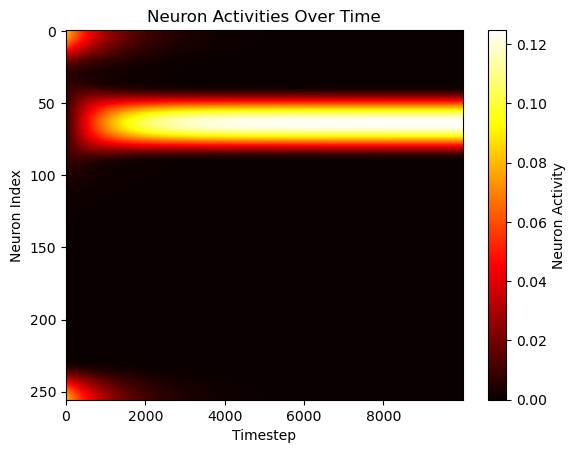

<Figure size 640x480 with 0 Axes>

In [130]:
import numpy as np
import matplotlib.pyplot as plt

#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/delta_90_jump_0.515750_2.341531.dat")

# Plot neuron activity over time
plt.imshow(data.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Neuron Activities Over Time")
plt.show()

from matplotlib.animation import FFMpegWriter

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'd90_jump_0.515750_2341531.mp4', 100):
    for i in range(5500):
        plt.plot(data[i])
        plt.title("Delta model, 90 degree input, Jump")
        plt.xlabel("Neuron Index")
        plt.ylabel("Activity Level")
        writer.grab_frame()
        plt.clf()


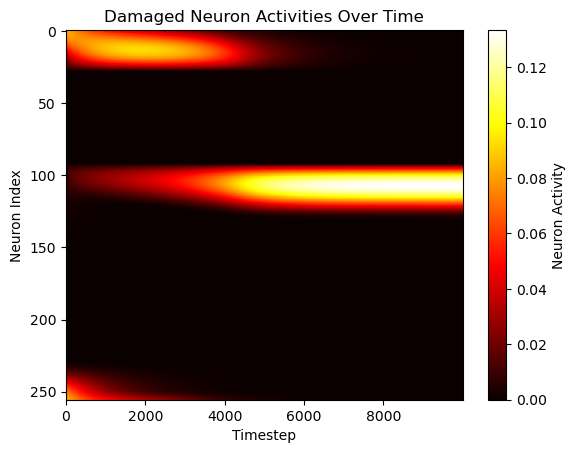

<Figure size 640x480 with 0 Axes>

In [138]:
#NB! FOR CLI ITS AMPLITUDE THEN WIDTH
# Load neuron activity data
data2 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/delta_90_jump_damage_85_64.dat")

# Plot neuron activity over time
plt.imshow(data2.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Damaged Neuron Activities Over Time")
plt.show()

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'd90_jump_damage_85_64.mp4', 100):
    for i in range(5500):
        plt.plot(data2[i])
        plt.title("Delta model, 90 degree input, Jump with Damage")
        plt.xlabel("Neuron Index")
        plt.ylabel("Activity Level")
        writer.grab_frame()
        plt.clf()

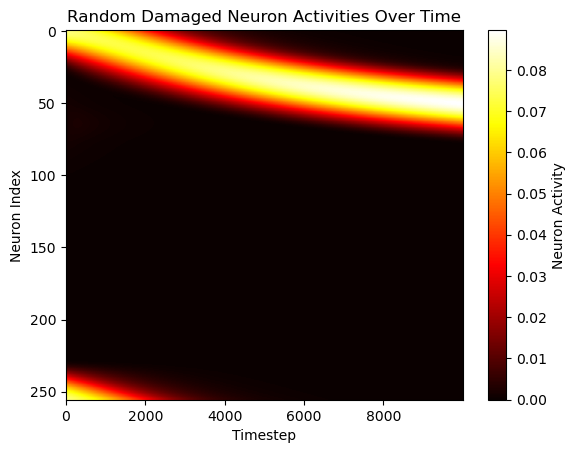

<Figure size 640x480 with 0 Axes>

In [141]:
# Load neuron activity data
data3 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/delta_90_flow_0.158750_2.341531.dat")

# Plot neuron activity over time
plt.imshow(data3.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Random Damaged Neuron Activities Over Time")
plt.show()

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'd90_flow_0.158750_2.341531.mp4', 100):
    for i in range(5500):
        plt.plot(data3[i])
        plt.title("Delta model, 90 degree input, Flow")
        plt.xlabel("Neuron Index")
        plt.ylabel("Activity Level")
        writer.grab_frame()
        plt.clf()

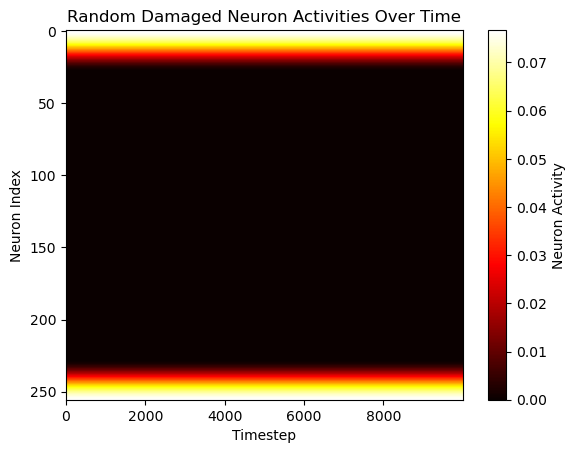

<Figure size 640x480 with 0 Axes>

In [146]:
# Load neuron activity data
data4 = np.loadtxt("/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/ring_attractor/build/src/delta_90_ne_0.010000_0.010000.dat")

# Plot neuron activity over time
plt.imshow(data4.T, aspect="auto", cmap="hot")
plt.colorbar(label="Neuron Activity")
plt.xlabel("Timestep")
plt.ylabel("Neuron Index")
plt.title("Random Damaged Neuron Activities Over Time")
plt.show()

metadata = dict(title='Movie', artist='Ciprian')
writer = FFMpegWriter(fps=500, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, 'd90_ne_0.010000_0.010000.mp4', 100):
    for i in range(5500):
        plt.plot(data4[i])
        plt.title("Delta model, 90 degree input, No Effect")
        plt.xlabel("Neuron Index")
        plt.ylabel("Activity Level")
        writer.grab_frame()
        plt.clf()

### TO DO:

try to do random damage trials - increase number of randomly damaged neurons and generate phase diagram

maximum activity index offset relative to normal - change localizaiton of damage and number of affected neurons; generate phase diagrams for same question. 





/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


No valid contour found near narrow input.


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col

No valid contour found near narrow input.


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


No valid contour found near narrow input.


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


No valid contour found near narrow input.


/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:


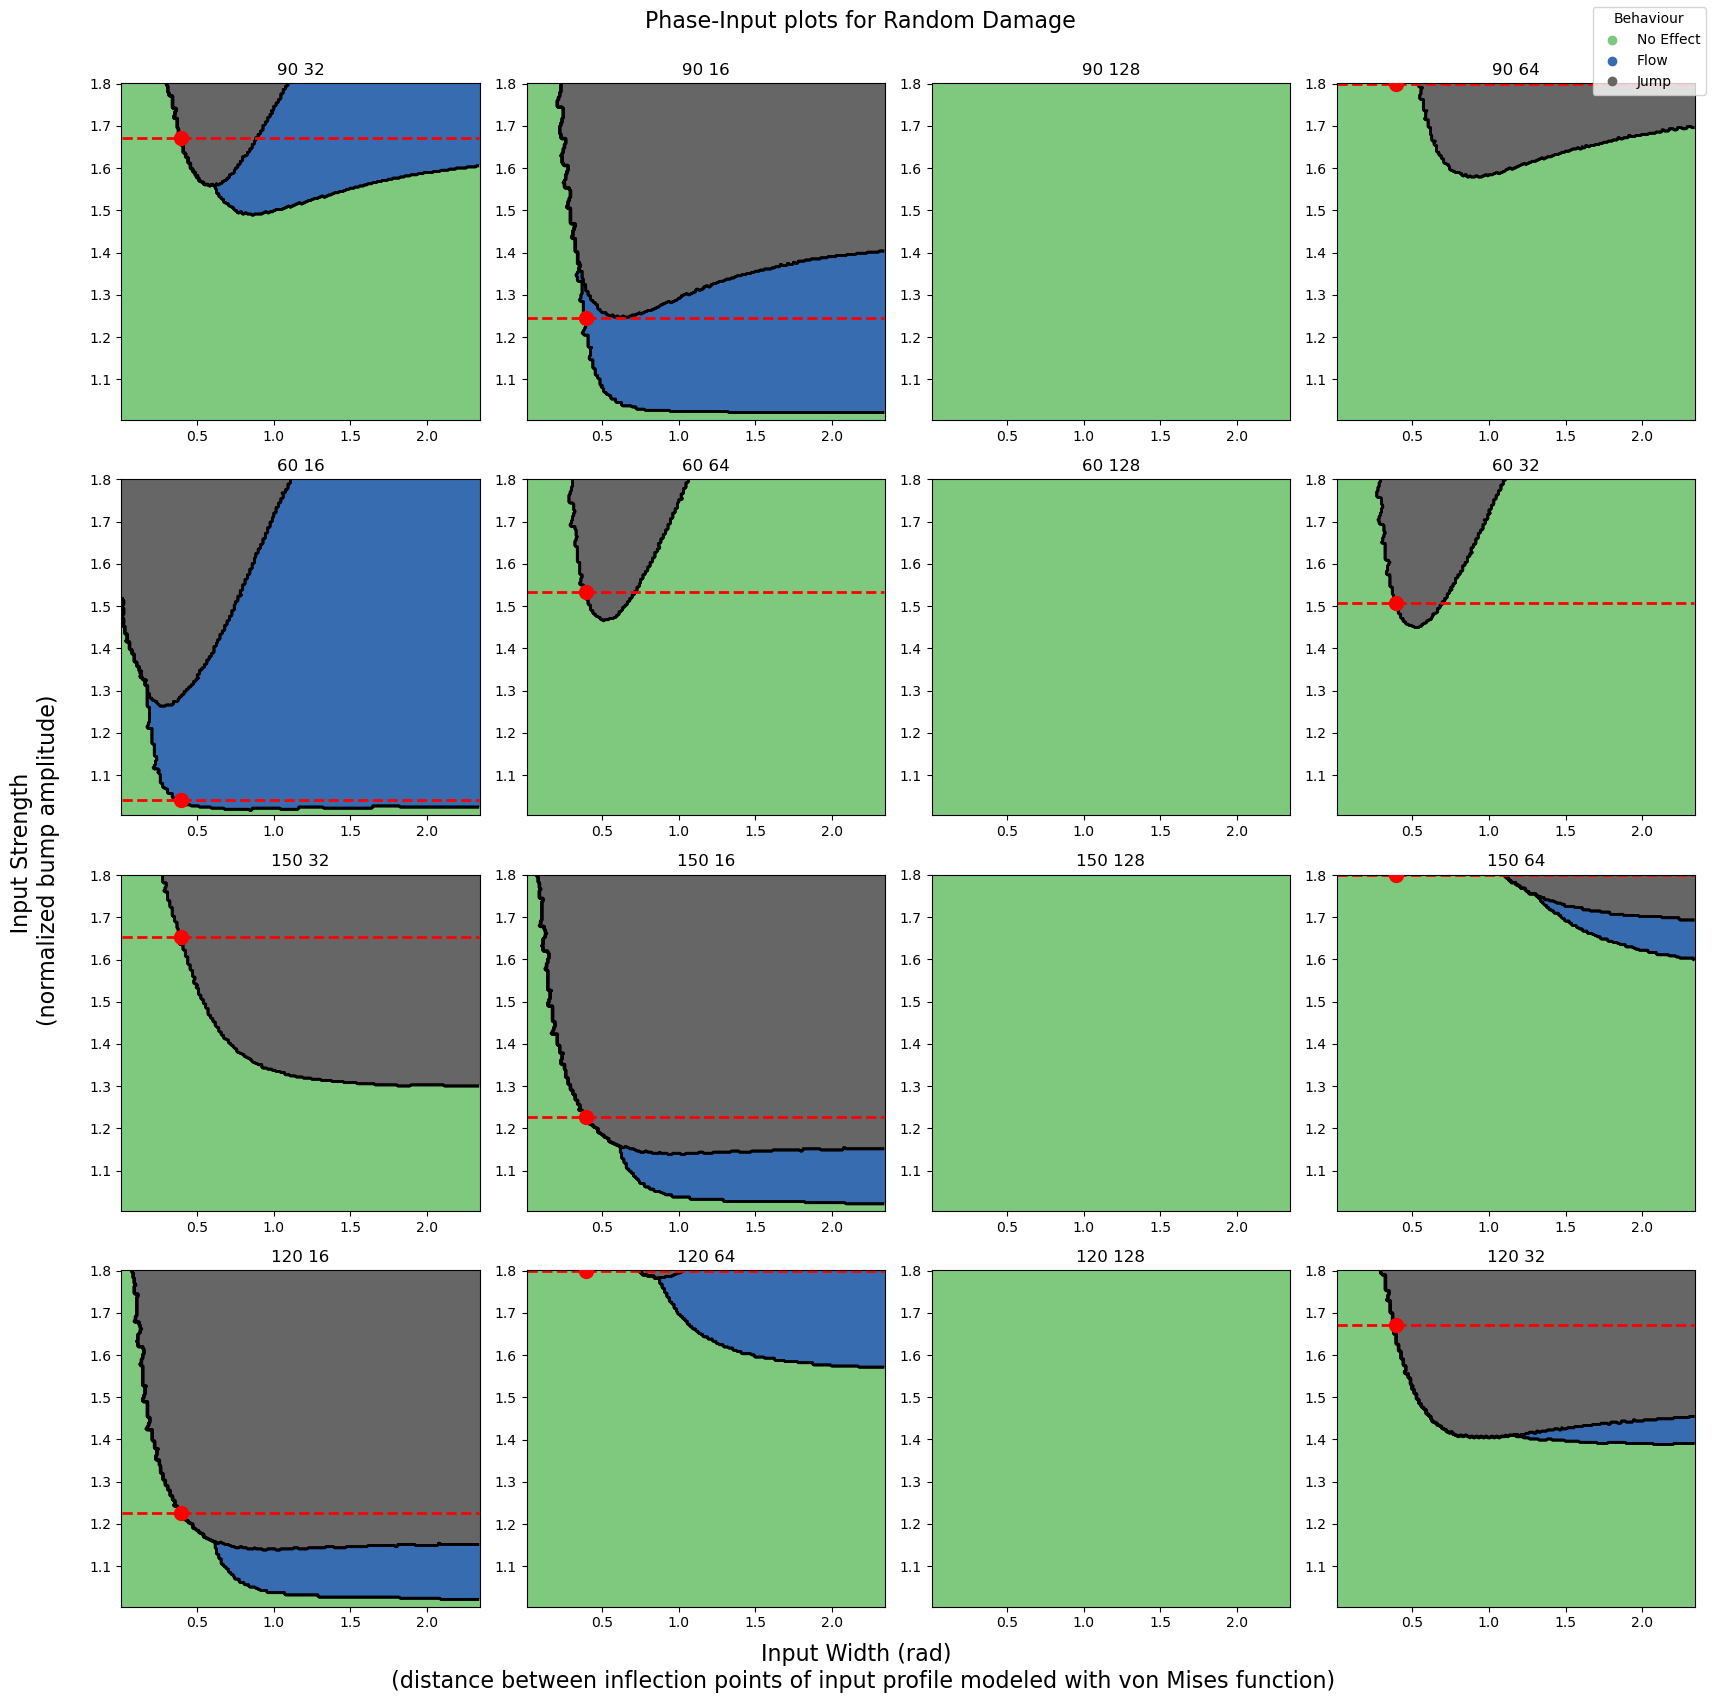

/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for collection in contour.collections:
/var/folders/f1/tvmmnqs17399g3n7wyy0pq0c0000gn/T/ipykernel_75293/3664327768.py:8: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col

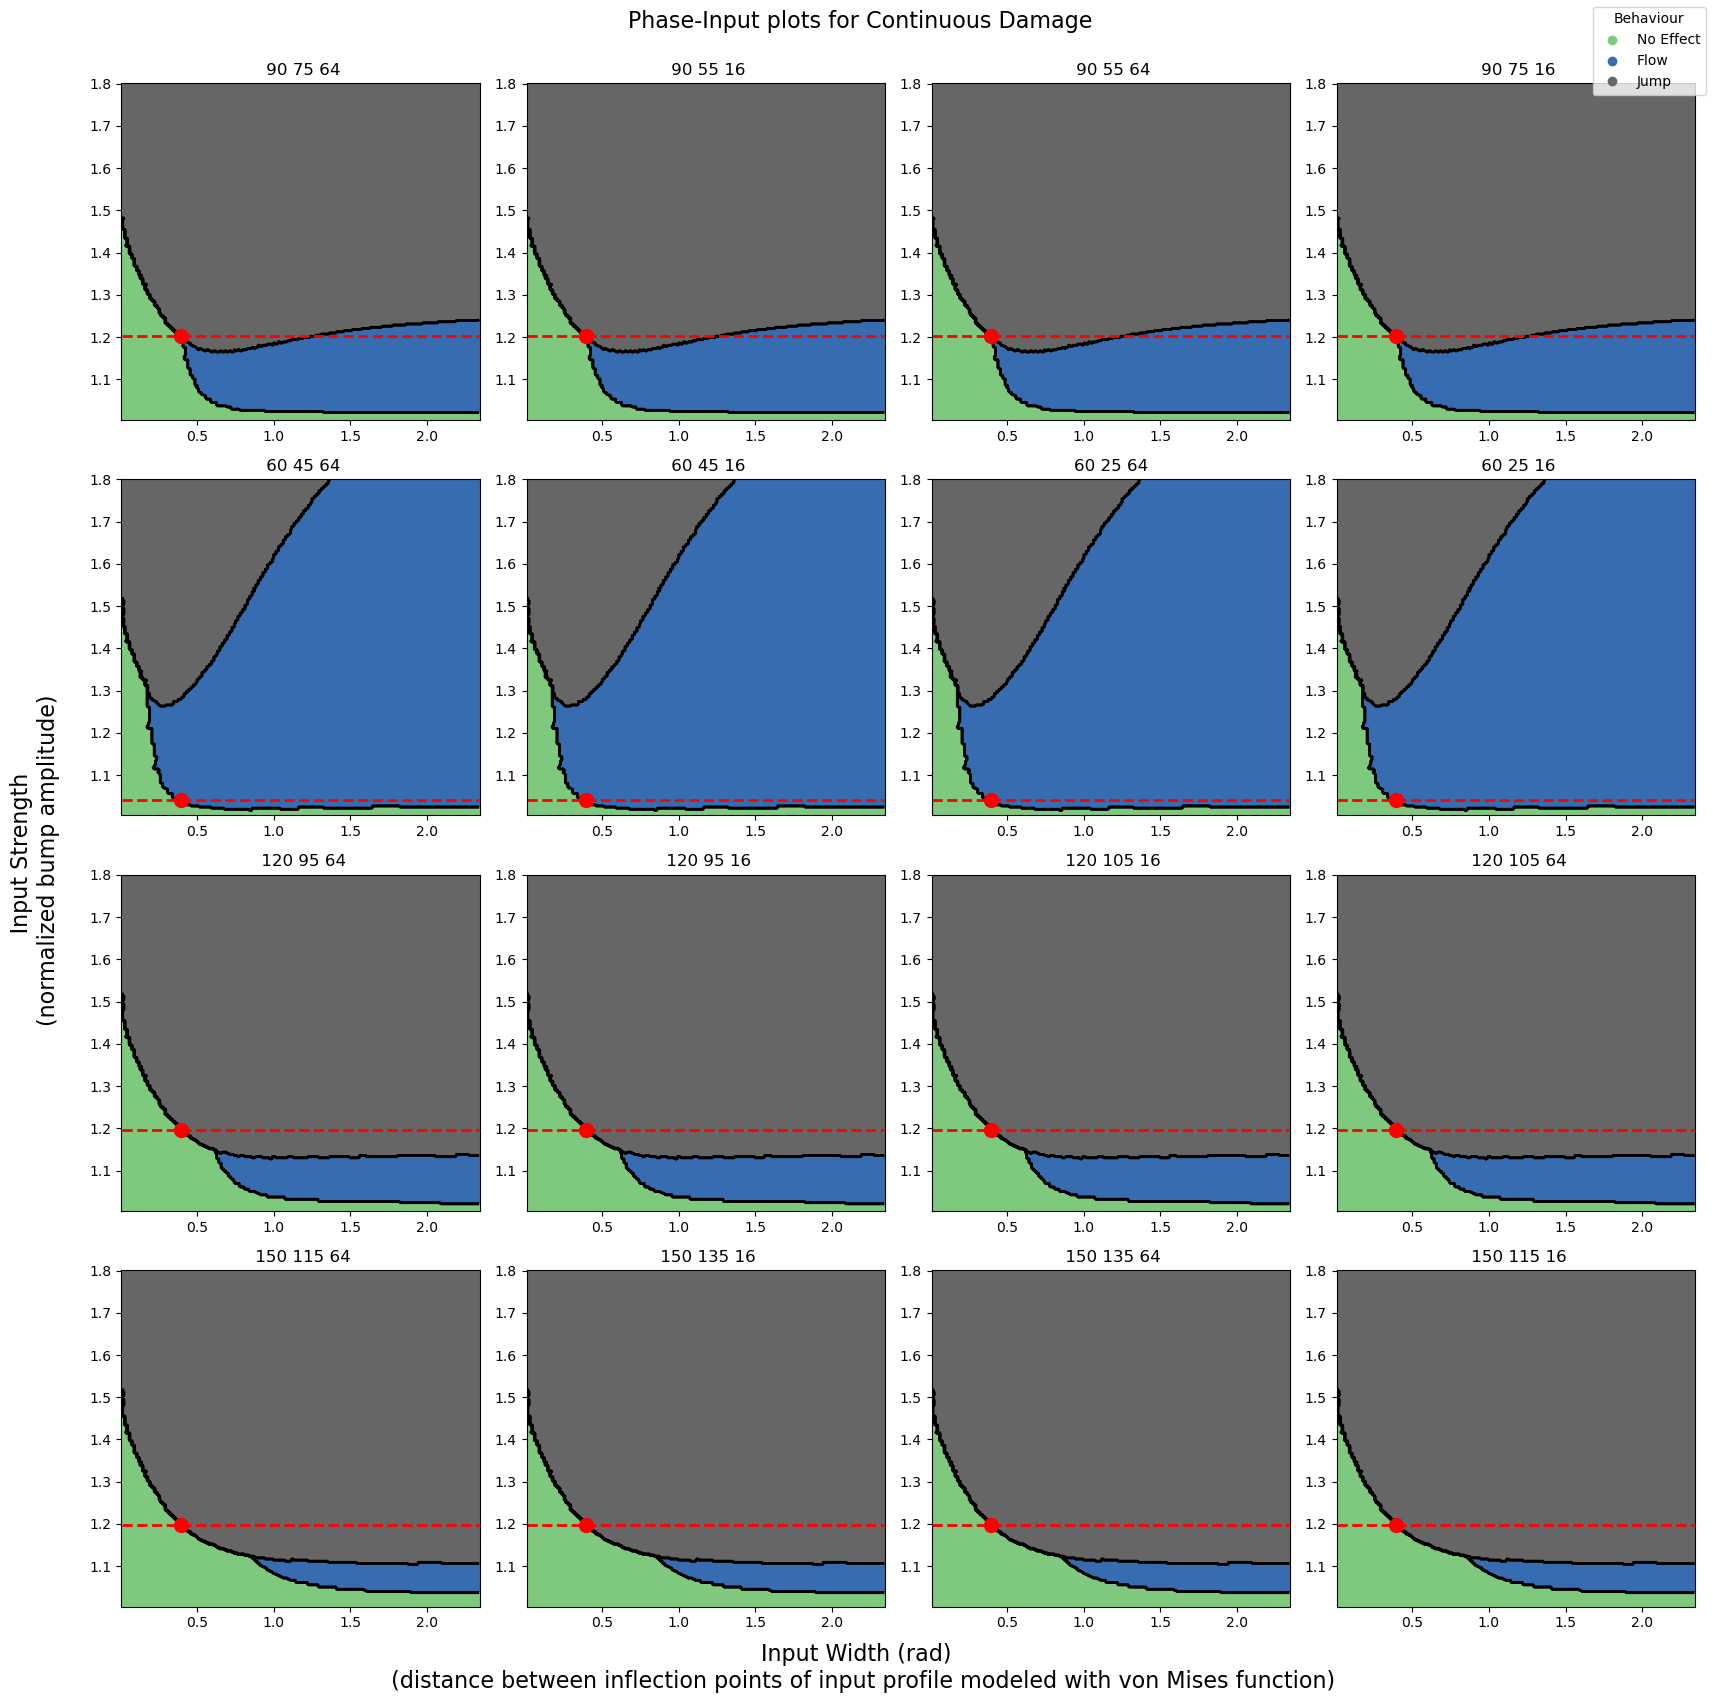

In [213]:
# plotting extra parameter sweeps
para_dir = "/Users/ciprianbangu/Cogmaster/S3/Theoretical Neuroscience/presentation/RingAttractor/results"
para_sweep_dirs = [d for d in os.listdir(para_dir) if 'para_sweep' in d]
conditions = ["Random Damage", "Continuous Damage"]
i = 0
for sweep_dir in para_sweep_dirs:
    full_dir = os.path.join(para_dir, sweep_dir)
    input_dist_dirs = [d for d in os.listdir(full_dir)]
    condition = conditions[i]
    
    fig, axs = plt.subplots(4, 4, figsize=(17, 17))
    axs = axs.flatten()
    
    plot_index = 0
    for dist_dir in input_dist_dirs:
        files = [f for f in os.listdir(os.path.join(full_dir, dist_dir))]
        for file in files:
            file_path = os.path.join(os.path.join(full_dir, dist_dir, file))
            df = pd.read_csv(file_path, delimiter=' ', header=None, names=header)
            df['normalized_bump_amplitude'] = df['ampliaft'] / df['ampliini']
            df = df[df['normalized_bump_amplitude'] <= 1.8]
            x = df['width'].to_numpy()
            y = df['normalized_bump_amplitude'].to_numpy()
            z = df['behaviour'].to_numpy()
            
            ax = axs[plot_index]
            title = f"{file}"
            c, contours = create_phase_map_with_contours(x, y, z, ax, title)
            create_phase_map_with_boundary_redlines(x, y, z, ax, title)
            
            ax.set_title(f'{file}'.replace("delta_", "").replace(".dat", "").replace("random_", "").replace("_", " ").replace("damage", ""))
            
            
            
            plot_index += 1
            if plot_index >= len(axs):
                break
        if plot_index >= len(axs):
            break
    fig.supxlabel("Input Width (rad) \n (distance between inflection points of input profile modeled with von Mises function)", fontsize=16)
    fig.supylabel("             Input Strength \n(normalized bump amplitude)", x=-0.00001, fontsize=16)
    fig.suptitle(f"Phase-Input plots for {condition}", fontsize=16, y=1.000001)
    handles, labels = scatter.legend_elements(prop="colors")
    legend_labels = ['No Effect', 'Flow', 'Jump']
    legend = fig.legend(handles, legend_labels, title="Behaviour", loc="upper right")
    plt.tight_layout()
    plt.savefig(f"damaged_sweep_{condition}.png", dpi = 200)
    plt.show()
    i += 1